# Support Vector Machine for Fraud Detection

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [44]:
# Train sets
x_train = pd.read_csv('./Datasets/x_train.csv')
y_train = pd.read_csv('./Datasets/y_train.csv')

# Validation sets
x_valid = pd.read_csv('./Datasets/x_valid.csv')
y_valid = pd.read_csv('./Datasets/y_valid.csv')

# Test sets
x_test = pd.read_csv('./Datasets/x_test.csv')
y_test = pd.read_csv('./Datasets/y_test.csv')


In [45]:
# Access the 'target_column' as a Pandas Series
y_train_series = y_train['fraud_bool']
# Convert the Pandas Series to a NumPy array
y_train = y_train_series.to_numpy()

# Access the 'target_column' as a Pandas Series
y_valid_series = y_valid['fraud_bool']
# Convert the Pandas Series to a NumPy array
y_valid = y_valid_series.to_numpy()

# Access the 'target_column' as a Pandas Series
y_test_series = y_test['fraud_bool']
# Convert the Pandas Series to a NumPy array
y_test = y_test_series.to_numpy()

/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yinkatana/opt/anaconda3/lib/python3.9/site-packages/s

Best Hyperparameters: {'C': 10, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l2'}
Train Average Class Accuracy with Best Model: 0.70
Train precision score with Best Model: 0.71
Train recall score with Best Model: 0.44
Train F1 score with Best Model: 0.54
Validation Average Class Accuracy with Best Model: 0.69
Validation precision score with Best Model: 0.72
Validation recall score with Best Model: 0.42
Validation F1 score with Best Model: 0.53
Test Average Class Accuracy with Best Model: 0.70
Test precision score with Best Model: 0.73
Test recall score with Best Model: 0.44
Test F1 score with Best Model: 0.55


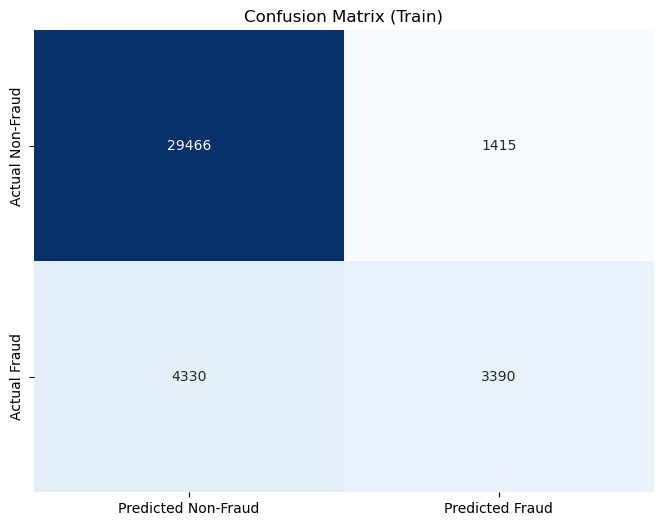

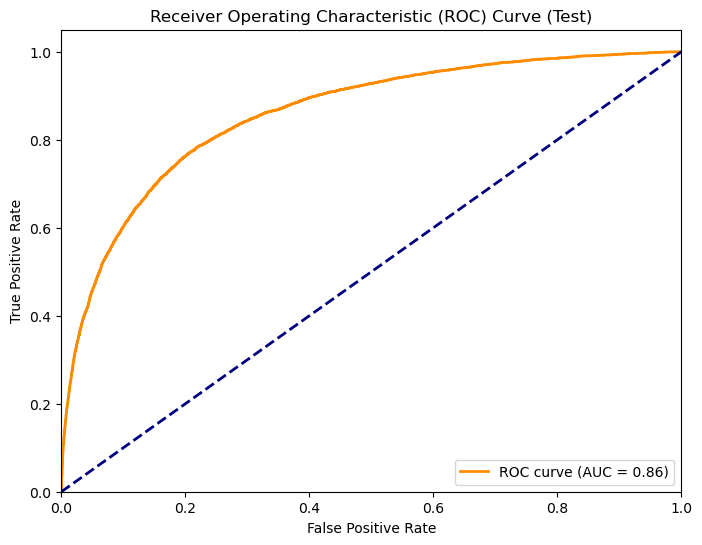

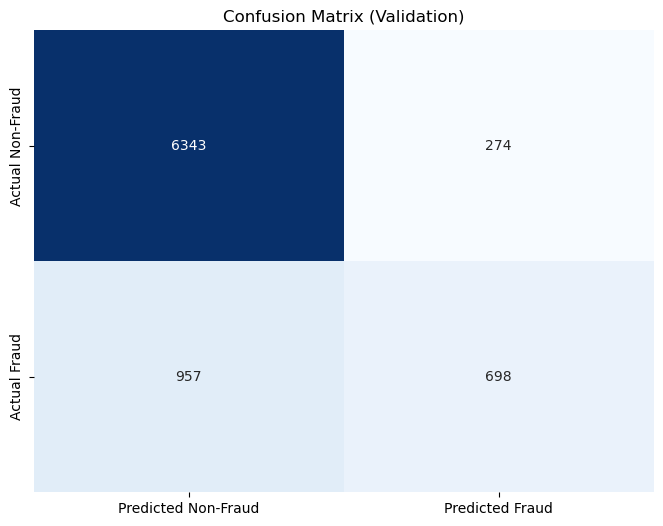

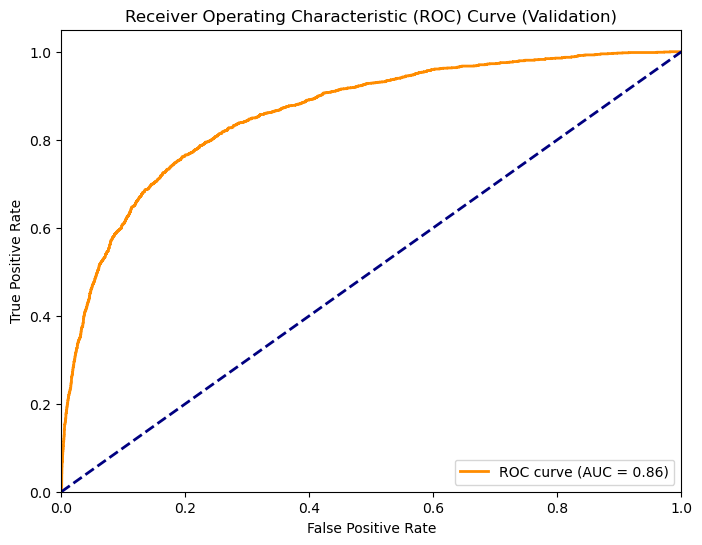

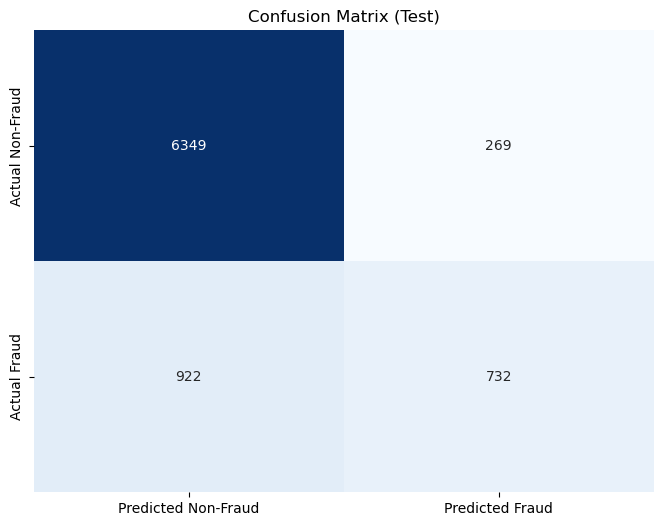

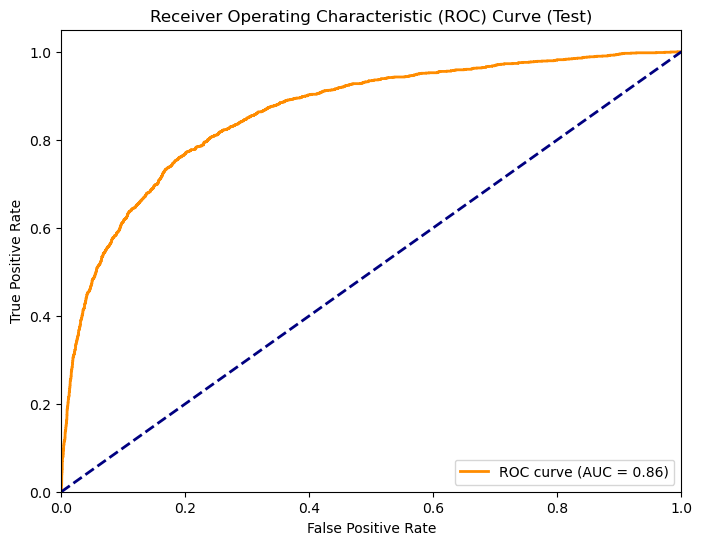

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Define the parameter distribution for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 2000, 3000]
}

# Create an SVM classifier
svm_classifier = LinearSVC(random_state=0)

# Create a RandomizedSearchCV object with cross-validation
grid_search = GridSearchCV(
    estimator=svm_classifier,  # Replace with your estimator
    param_grid=param_grid,      # Replace with your parameter grid
    scoring='f1',
    cv=10,
    n_jobs=-1  # Use -1 to utilize all available CPU cores
)

# Fit the random search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the random search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# # Get the best SVM model from the random search
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_train_pred = best_svm_classifier.predict(x_train)

# Calculate accuracy on the validation set
valid_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print(f"Train Average Class Accuracy with Best Model: {valid_accuracy:.2f}")
precision = precision_score(y_train, y_train_pred)
print(f"Train precision score with Best Model: {precision:.2f}")
recall = recall_score(y_train, y_train_pred)
print(f"Train recall score with Best Model: {recall:.2f}")
f1 = f1_score(y_train, y_train_pred)
print(f"Train F1 score with Best Model: {f1:.2f}")

# Make predictions on the validation set using the best model
y_valid_pred = best_svm_classifier.predict(x_valid)

# Calculate accuracy on the validation set
valid_accuracy = balanced_accuracy_score(y_valid, y_valid_pred)
print(f"Validation Average Class Accuracy with Best Model: {valid_accuracy:.2f}")
precision = precision_score(y_valid, y_valid_pred)
print(f"Validation precision score with Best Model: {precision:.2f}")
recall = recall_score(y_valid, y_valid_pred)
print(f"Validation recall score with Best Model: {recall:.2f}")
f1 = f1_score(y_valid, y_valid_pred)
print(f"Validation F1 score with Best Model: {f1:.2f}")

# Make predictions on the test set using the best model
y_test_pred = best_svm_classifier.predict(x_test)

# Calculate accuracy on the test set
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print(f"Test Average Class Accuracy with Best Model: {test_accuracy:.2f}")
precision = precision_score(y_test, y_test_pred)
print(f"Test precision score with Best Model: {precision:.2f}")
recall = recall_score(y_test, y_test_pred)
print(f"Test recall score with Best Model: {recall:.2f}")
f1 = f1_score(y_test, y_test_pred)
print(f"Test F1 score with Best Model: {f1:.2f}")

# Confusion Matrix for train set
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Non-Fraud", "Predicted Fraud"], yticklabels=["Actual Non-Fraud", "Actual Fraud"])
plt.title("Confusion Matrix (Train)")

# ROC AUC
y_train_pred_prob = best_svm_classifier.decision_function(x_train)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
# Calculate the AUC-ROC
roc_auc = roc_auc_score(y_train, y_train_pred_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for validation set
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Non-Fraud", "Predicted Fraud"], yticklabels=["Actual Non-Fraud", "Actual Fraud"])
plt.title("Confusion Matrix (Validation)")

# ROC AUC
y_valid_pred_prob = best_svm_classifier.decision_function(x_valid)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred_prob)
# Calculate the AUC-ROC
roc_auc = roc_auc_score(y_valid, y_valid_pred_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Validation)')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for test set
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Non-Fraud", "Predicted Fraud"], yticklabels=["Actual Non-Fraud", "Actual Fraud"])
plt.title("Confusion Matrix (Test)")

# ROC AUC
y_test_pred_prob = best_svm_classifier.decision_function(x_test)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
# Calculate the AUC-ROC
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test)')
plt.legend(loc='lower right')
plt.show()
